Linear Model
Coefficients of the modelled data: 	The value of β0 is -1 	The value of β1 is 0.5
Linear Regression Model:	β0: -0.9624234574737428	β1: 0.5573492167731903	R2 Score: 0.5442026056130188
Polynomial Regression Model: 	β0: 0.0	β1: 0.5615154693913307	β2: -0.03337577606653486	R2 Score: 0.5474172793635277
Polynomial Features Model
Coefficients of the modelled data: 	The value of β0 is -1 	The value of β1 is 0.5
Linear Regression Model:	β0: -0.14642166438304172	β1: 0.6649123093602457	R2 Score: 0.19161433259804572
Polynomial Regression Model: 	β0: 0.0	β1: 0.546809812107298	β2: 1.0077113004691267	R2 Score: 0.88090399375988


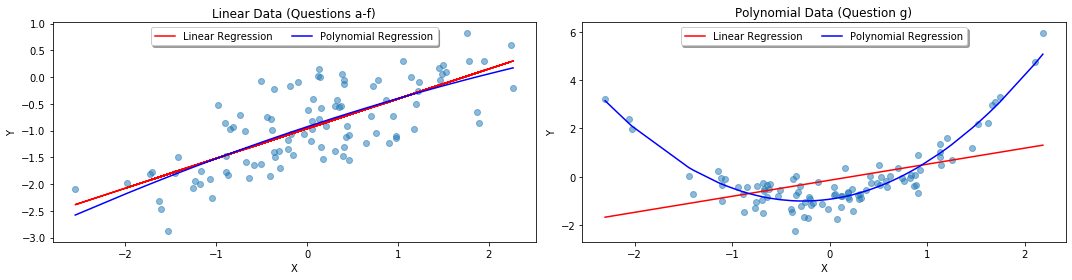

In [1]:
import numpy as np
import copy, operator
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

np.random.seed(0)

#(a)
X = np.resize( np.array([np.random.normal(0.0,1,100)]), (100,1))
#(b)
eps = np.resize( np.array([np.random.normal(0.0,0.5,100)]), (100,1)) 
#(c)
Y = np.resize( -1 + 0.5*X + eps, (100,)) 
XTest = copy.deepcopy(X)
XTest.sort(axis=0)


Model1 = LinearRegression().fit(X, Y)


Model2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression()).fit(X, Y)

beta0, beta1, beta2 = Model2.steps[1][1].coef_

print(color.BOLD + 'Linear Model' + color.END)

print('Coefficients of the modelled data: \tThe value of \N{greek small letter beta}0 is -1 \tThe value of \N{greek small letter beta}1 is 0.5')

print( "Linear Regression Model:\t"+'\N{greek small letter beta}' + "0: " + str(Model1.intercept_ ) + "\t" + '\N{greek small letter beta}'+ "1: " + str(Model1.coef_[0]) + "\t" + "R2 Score: " + str(r2_score(Y, Model1.predict(X))))
print( "Polynomial Regression Model: \t" + '\N{greek small letter beta}' +"0: " + str(beta0) + "\t" + '\N{greek small letter beta}' +"1: " + str(beta1) + "\t" + '\N{greek small letter beta}' +"2: " + str(beta2) + "\t" + "R2 Score: " + str(r2_score(Y, Model2.predict(X))))


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
ax[0].set(xlabel='X', ylabel='Y', title='Linear Data (Questions a-f)')
ax[0].scatter(X, Y, alpha = 0.5)
ax[0].plot(X, Model1.predict(X), color='red', label = 'Linear Regression')
ax[0].plot(XTest, Model2.predict(XTest), color='blue', label = 'Polynomial Regression')
ax[0].legend(loc = 'upper center', bbox_to_anchor= (0.5,1.00), ncol = 3, fancybox = True, shadow = True)

# (g)
np.random.seed(1)
X = np.resize( np.array([np.random.normal(0.0,1,100)]), (100,1)) # (g - a)
eps = np.resize( np.array([np.random.normal(0.0,0.5,100)]), (100,1)) # (g - b)
Y = np.resize( -1 + 0.5*X + X**2 + eps, (100,)) # (g - c)
XTest = copy.deepcopy(X)
XTest.sort(axis=0)

Model1 = LinearRegression().fit(X, Y)



Model2 = make_pipeline(PolynomialFeatures(degree=2), LinearRegression()).fit(X, Y)

beta0, beta1, beta2 = Model2.steps[1][1].coef_

print('======================================================================================================')

print(color.BOLD + 'Polynomial Features Model' + color.END)
print('Coefficients of the modelled data: \tThe value of \N{greek small letter beta}0 is -1 \tThe value of \N{greek small letter beta}1 is 0.5')

print( "Linear Regression Model:\t"+'\N{greek small letter beta}' + "0: " + str(Model1.intercept_ ) + "\t" + '\N{greek small letter beta}'+ "1: " + str(Model1.coef_[0]) + "\t" + "R2 Score: " + str(r2_score(Y, Model1.predict(X))))
print( "Polynomial Regression Model: \t" + '\N{greek small letter beta}' +"0: " + str(beta0) + "\t" + '\N{greek small letter beta}' +"1: " + str(beta1) + "\t" + '\N{greek small letter beta}' +"2: " + str(beta2) + "\t" + "R2 Score: " + str(r2_score(Y, Model2.predict(X))))


ax[1].set(xlabel='X', ylabel='Y', title='Polynomial Data (Question g)')
ax[1].scatter(X,Y, alpha=0.5)
ax[1].plot(XTest, Model1.predict(XTest), color='red', label='Linear Regression')
ax[1].plot(XTest, Model2.predict(XTest), color='blue', label='Polynomial Regression')
ax[1].legend(loc = 'upper center', bbox_to_anchor= (0.5,1.00), ncol = 3, fancybox = True, shadow = True)
plt.tight_layout()
plt.show()


(d) The data is generated from the linear function f(x) = 0.5x - 1 plus random error $\epsilon$. The data points for this set are distributed around 0 with the vast majority (around ~66%) of X values occuring within one standard deviation of 0 plus or minus 1, due to the normal distribution. The error term is also pulled from a normal distribution, but with less variance. Thus the majority of points, (around ~66%) of Y values occur within plus or minus 0.5 from the line f(x) = 0.5x - 1

(e) The model obtained quite closely ressembles the function f(x) = 0.5x - 1. However due to the error term $\epsilon$, the weights for $\beta0$ and $\beta1$ are slightly off those in the function f(x) = 0.5x - 1. From the $R^2$ score we can assert that the independent variable X in the model does not explain much of the variation present in the dependent variable Y. This is expected, since we deliberately added randomly distributed error values to our data.


Coefficients of the modelled data: The value of β0 is -1 The value of β1 is 0.5

Linear Regression Model β0: -0.9264 β1: 0.5477 R2 Score: 0.5218

Polynomial Regression Model β0: 0.0 β1: 0.5468 β2: 0.0077 R2 Score: 0.5220


(f) The quadratic term does not greatly improve the fit of the model. Since the underlying distribution of data comes from a linear function (plus a small error term) the polynomial function simply sets $\beta2$ close to zero and we're approximating a linear function again. We don't gain much information from the extra degrees of freedom offered by the $X^2$ term.

(g - d) The data is generated from the quadratic function f(x) = $x^2$ + 0.5x - 1 plus some random error $\epsilon$. The data points for this set are also distributed around 0 with the vast majority ~66% of X values occuring within one standard deviation of 0 plus or minus 1, due to the normal distribution. Again similar to before the error term is also pulled from a normal distribution, but with less variance. Thus the majority of points, again ~66% of Y values occuring within plus or minus 0.5 from the parabola f(x) = $x^2$ + 0.5x - 1

(g - e) Since we are now fitting a linear model to a distribution of data that is pulled from a quadratic function, it is expected that we will not be able to express the underlying data well. The model still has some predictive value but this is entirely due to the distribution of data and can be seen in the figure above. The bulk of data points are centered around 0 and our linear model has less slope than before and a minimal bias term. Thus, we cannot accurately express the variance in output solely from our new inputs which can be seen by the low $R^2$ Score.

(g - f) Unlike before, the additional degree of freedom provided by the polynomial regression allows for more accurate modelling. This new model more closely represents the underlying data as can be seen by the weights of the polynomial model closely lining up with the parabola f(x) = $x^2$ + 0.5x - 1 (plus some error). When comparing the $R^2$ terms between models it is clear that the polynomial model more accurately accounts for the variance in output.

Coefficients of the modelled data: The value of β0 is -1 The value of β1 is 0.5 The value of β2 is 1

Linear Regression Model: β0: -0.1464 β1: 0.6649 R2 Score: 0.1916

Polynomial Regression Model: β0: 0.0 β1: 0.5468 β2: 1.0077 R2 Score: 0.8809
